In [2]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Pfad zum Hauptordner, der alle Konfigurationsordner enthält
main_folder = "./../../../runs/transfer18_n2self_radius"

# Dictionary zum Speichern der Daten für jede Konfiguration
loss_train_dict = {}
psnr_val_dict = {}
sim_val_dict = {}



# Durchlaufe alle Unterordner im Hauptordner
for config in os.listdir(main_folder):
    config_path = os.path.join(main_folder, config, "tensorboard")
    if os.path.isdir(config_path):
        # Suche die TensorBoard-Datei (event file) im Ordner
        for file in os.listdir(config_path):
            if file.startswith("events.out.tfevents"):
                event_file = os.path.join(config_path, file)
                
                # Initialisiere den Event-Accumulator und lade die Daten
                ea = event_accumulator.EventAccumulator(event_file)
                ea.Reload()  # Daten laden
                print(ea.Tags()["scalars"])
                
                # Extrahiere die PSNR-Scalars
                #if 'Train PSNR [0,1] avg' in ea.Tags()["scalars"]:
                try:
                    values = ea.Scalars('Train Loss')#loss/train
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    loss_train_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('PSNR/validation')
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    psnr_val_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                try:
                    values = ea.Scalars('sim/validation')
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    sim_val_dict[config] = {
                        "steps": [x.step for x in values],
                        "values": [x.value for x in values]
                    }
                except:
                    pass
                break  # Wir gehen davon aus, dass es nur eine Event-Datei pro Konfiguration gibt

# Matplotlib-Plot für jede Konfiguration erstellen


['True Noise sigma', 'Train Loss', 'Train PSNR_iteration [0,1]', 'Train Original PSNR (not normed)', 'Train Similarity_iteration', 'Train PSNR [0,1] avg', 'Validation Loss', 'Validation PSNR_iteration [0,1]', 'Validation Original PSNR (not normed)', 'Validation Similarity_iteration', 'Validation PSNR [0,1] avg', 'loss/train', 'loss/validation', 'PSNR/train', 'PSNR/validation', 'sim/train', 'sim/validation', 'PSNR Test', 'PSNR original (bot normed) Test', 'Loss Test', 'Sim Test']
['True Noise sigma', 'Train Loss', 'Train PSNR_iteration [0,1]', 'Train Original PSNR (not normed)', 'Train Similarity_iteration', 'Train PSNR [0,1] avg', 'Validation Loss', 'Validation PSNR_iteration [0,1]', 'Validation Original PSNR (not normed)', 'Validation Similarity_iteration', 'Validation PSNR [0,1] avg', 'loss/train', 'loss/validation', 'PSNR/train', 'PSNR/validation', 'sim/train', 'sim/validation', 'PSNR Test', 'PSNR original (bot normed) Test', 'Loss Test', 'Sim Test']
['True Noise sigma', 'Train Loss

C:\Users\Alex-Master\AppData\Local\Temp\ipykernel_15080\1541340886.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 0.5)


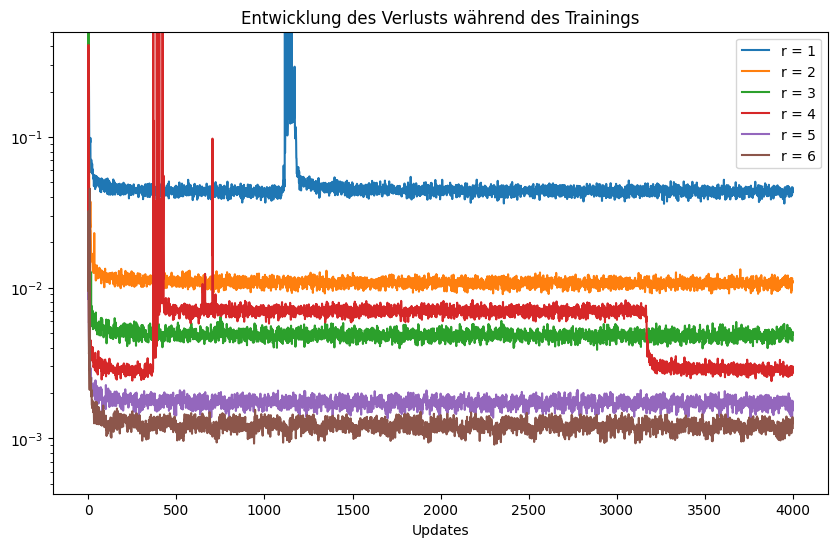

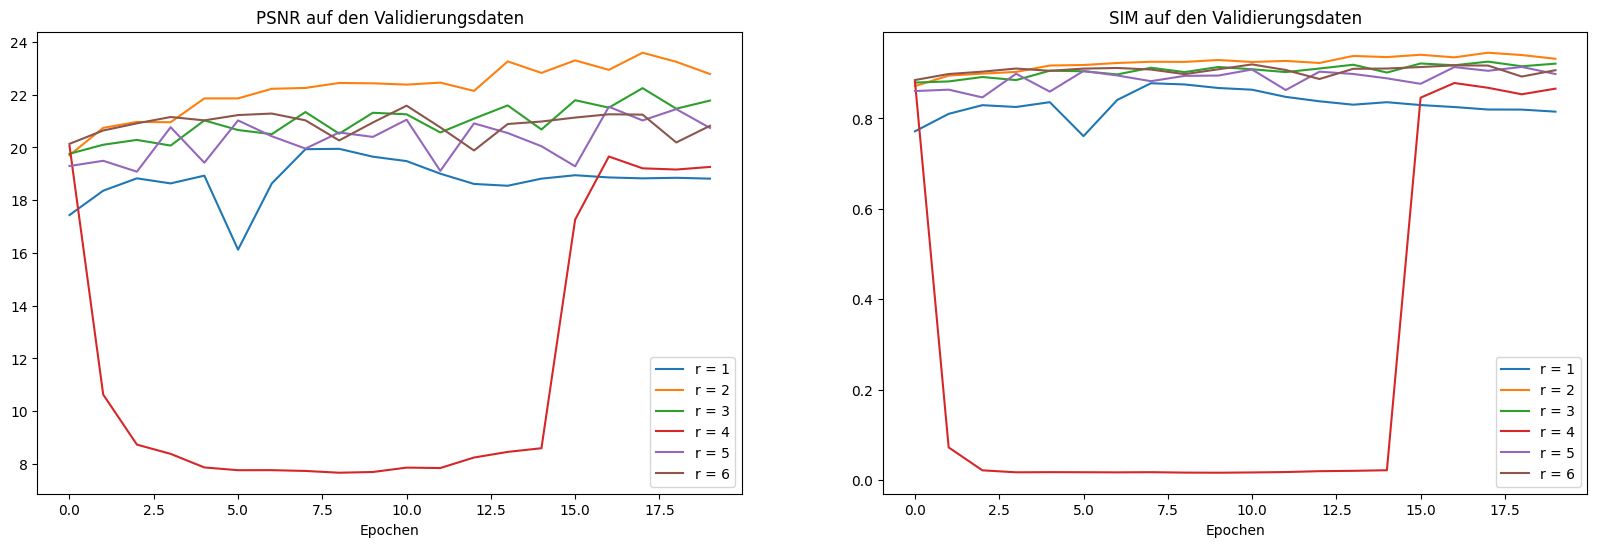

In [25]:
plt.figure(figsize=(10, 6))
for config, data in loss_train_dict.items():
    plt.plot(data["steps"], data["values"], label=f"r = {config[-1]}")

plt.yscale('log')
plt.ylim(0, 0.5)
plt.xlabel("Updates")
#plt.ylabel("PSNR (Train)")
plt.title("Entwicklung des Verlusts während des Trainings")
plt.legend()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot for PSNR
for idx, (config, data) in enumerate(psnr_val_dict.items()):
    ax1.plot(data["steps"], data["values"], label=f"r = {config[-1]}")
ax1.set_xlabel("Epochen")
#ax1.set_ylabel("PSNR")
ax1.set_title("PSNR auf den Validierungsdaten")
ax1.legend()

# Plot for SIM
for idx, (config, data) in enumerate(sim_val_dict.items()):
    ax2.plot(data["steps"], data["values"], label=f"r = {config[-1]}")
ax2.set_xlabel("Epochen")
#ax2.set_ylabel("SIM")
ax2.set_title("SIM auf den Validierungsdaten")
ax2.legend()

plt.show()


In [18]:
lines[0].get_color()

'C0'